### **Backtracking (vuelta atras)**
*los que entendieron Dark pasaran un poquito menos de trabajo con este contenido*

**recuerdan las matrices?**

¿Se pueden colocar 8 reinas en un tablero de ajedrez sin que se amenacen entre sí?


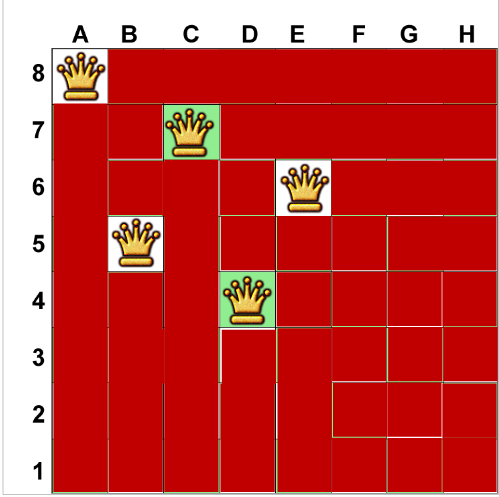

Faltan 3 reinas por colocar y no se pueden poner más, **¿qué hacer?**

`Volver atrás y colocar la última reina en otra posición, luego intentar de nuevo colocar el resto`


#### **Algoritmo para ubicar N reinas**

1. Si la cantidad de reinas a ubicar es 0 (**ya se han ubicado todas las reinas y por tanto hay solución**)
2. Se recorren las columnas de izquierda a derecha tratando de ubicar una reina en cada columna
3. Para ubicar una reina en una columna se prueba con todas las celdas (**filas**) de esa columna verificando que no amenace a las reinas ya ubicadas en las columnas anteriores. **Si existe la tal celda se verifica si se pueden ubicar las reinas restantes en las columnas a la derecha.**
4. Si ninguna celda de la actual columna satisface el `paso 3` entonces no se puede ubicar ninguna reina en la columna. En tal caso hay que `Volver Atrás` e **intentar ubicar la reina de la columna en otra celda e intentar de nuevo el algoritmo.**
5. Si al `Volver Atrás` se llega a la primera columna, y ya no queda ninguna celda por probar en esta columna, **entonces el problema no tiene solución.**


In [1]:
def es_seguro(tablero, fila, columna):
    # Verifica si hay una reina en la misma fila
    for i in range(columna):
        if tablero[fila][i] == 1:
            return False
    
    # Verifica si hay una reina en la diagonal superior izquierda
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False
    
    # Verifica si hay una reina en la diagonal inferior izquierda
    for i, j in zip(range(fila, len(tablero), 1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False
    
    return True

def ubicar_reinas_util(tablero, columna):
    # Si todas las reinas están ubicadas, retorna verdadero
    if columna >= len(tablero):
        return True
    
    # Intenta ubicar esta reina en todas las filas de la columna actual
    for i in range(len(tablero)):
        if es_seguro(tablero, i, columna):
            tablero[i][columna] = 1
            
            # Llama recursivamente para ubicar las reinas restantes
            if ubicar_reinas_util(tablero, columna + 1):
                return True
            
            # Si colocar la reina aquí no lleva a una solución, vuelve atrás
            tablero[i][columna] = 0
    
    # Si no se puede ubicar la reina en ninguna fila de esta columna, retorna falso
    return False

def ubicar_reinas(n):
    # Inicializa el tablero con ceros
    tablero = [[0 for _ in range(n)] for _ in range(n)]
    
    # Comienza desde la columna 0
    if not ubicar_reinas_util(tablero, 0):
        print("No hay solución posible")
        return False
    
    # Imprime el tablero con las reinas ubicadas
    for fila in tablero:
        print(fila)
    return True

# Ejemplo de uso
n = 8
ubicar_reinas(n)


[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]


True

#### **Algoritmo Backtracking**
1. Descomponer el problema original en subproblemas más simples o alternativas
2. Intentar resolver cada alternativa
3. Cuando una alternativa no tiene solución, `volver atrás` e **intentar con las demás alternativas**
4. Si se encuentra solución por alguna alternativa, **entonces el problema original tiene solución**
5. Si ninguna alternativa tuvo solución, **entonces el problema original no tiene solución** (`por ejemplo, no se pueden colocar 3 reinas en un tablero de 3 x 3`)


#### **Saber si existe un camino en un laberinto**

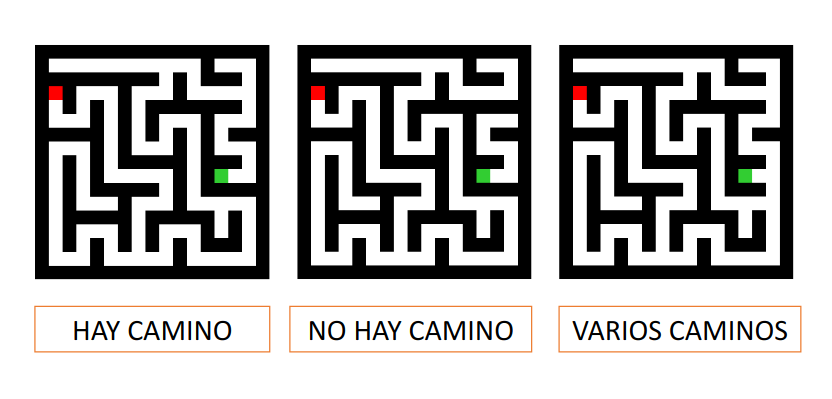

#### **Algoritmo para buscar un camino**

1. Si el `origen` coincide con el `destino`, **hay camino**
2. Si es posible, moverse a la casilla de arriba, y buscar un camino desde esa nueva posición
3. Si se encontró un camino desde la nueva posición, **entonces hay camino desde origen a destino**
4. Si no, `Volver Atrás` y reintentar el `paso 2` con las otras `3 casillas adyacentes`
5. Si no se encontró un camino desde ninguna de las `4 casillas adyacentes`, **entonces no hay camino de origen a destino**

In [2]:
def buscar_camino_lab(laberinto, fila, columna, destino):
    # Verifica si el origen coincide con el destino
    if (fila, columna) == destino:
        return True
    
    # Verifica si la casilla actual es válida
    if fila < 0 or fila >= len(laberinto) or columna < 0 or columna >= len(laberinto[0]) or laberinto[fila][columna] == 0:
        return False
    
    # Marca la casilla como visitada
    laberinto[fila][columna] = 0
    
    # Intenta moverse hacia arriba
    if buscar_camino_lab(laberinto, fila - 1, columna, destino):
        return True
    
    # Intenta moverse hacia la derecha
    if buscar_camino_lab(laberinto, fila, columna + 1, destino):
        return True
    
    # Intenta moverse hacia abajo
    if buscar_camino_lab(laberinto, fila + 1, columna, destino):
        return True
    
    # Intenta moverse hacia la izquierda
    if buscar_camino_lab(laberinto, fila, columna - 1, destino):
        return True
    
    # Si ninguna dirección lleva al destino, retrocede
    laberinto[fila][columna] = 1
    return False

# Ejemplo de uso
laberinto = [
    [1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1],
    [0, 0, 0, 1, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 1, 1, 1]
]
origen = (0, 0)
destino = (4, 4)

if buscar_camino_lab(laberinto, origen[0], origen[1], destino):
    print("Hay un camino desde el origen hasta el destino.")
else:
    print("No hay un camino desde el origen hasta el destino.")


Hay un camino desde el origen hasta el destino.


#### **Problema del viajante (problema del vendedor viajero, problema del vendedor ambulante, problema del agente viajero, etc.)**

Este es uno de los problemas mas conocidos de la computacion y responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen?

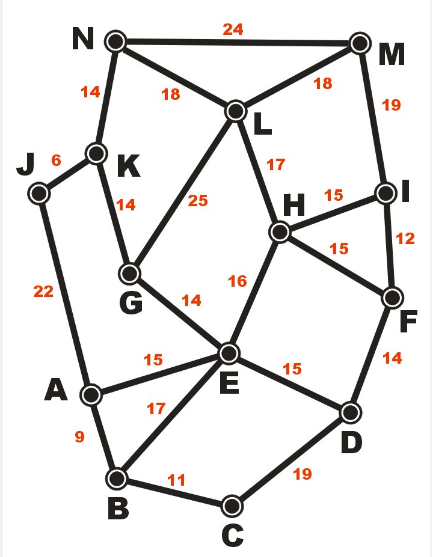


El problema del viajante, en términos sencillos, trata sobre encontrar la ruta más corta que pasa por todas las ciudades (nodos) exactamente una vez y regresa al nodo de origen. Imagina que eres un vendedor que necesita visitar múltiples ciudades para hacer ventas, y deseas encontrar la ruta más corta posible para minimizar los costos de viaje y maximizar las ganancias.

Para comprender cómo se aplica el backtracking en este problema, podemos dividirlo en pasos:

Definir las ciudades y las distancias entre ellas: Primero, necesitamos tener información sobre las ciudades que queremos visitar y las distancias entre ellas. Esto se puede representar fácilmente con una matriz, la celda i,k representaria la distancia que hay de i hasta j si ambas ciudades son adjacentes.

Generar todas las posibles rutas: Una vez que tenemos el grafo, necesitamos generar todas las posibles rutas que podríamos tomar para visitar todas las ciudades exactamente una vez y regresar al nodo de origen. Aquí es donde entra en juego el backtracking. Utilizando un enfoque recursivo, comenzamos desde la ciudad de origen y exploramos todas las ciudades vecinas posibles. Luego, recursivamente, exploramos todas las posibles combinaciones de ciudades, retrocediendo cuando alcanzamos un punto muerto o una solución inválida.

Evaluar la longitud de las rutas: Mientras generamos todas estas posibles rutas, también calculamos la longitud de cada ruta. Al final, mantenemos un registro de la ruta más corta encontrada hasta el momento.

Elegir la ruta más corta: Una vez que hemos explorado todas las posibles combinaciones de ciudades y hemos calculado la longitud de cada ruta, seleccionamos la ruta más corta como nuestra solución óptima.

El backtracking es útil en este problema porque nos permite explorar exhaustivamente todas las posibles combinaciones de ciudades sin necesidad de almacenar todas las rutas posibles en la memoria. En su lugar, generamos y evaluamos las rutas de manera incremental, lo que nos permite encontrar la solución óptima de manera eficiente.

In [2]:
def initialize_graph(num_cities):
    graph = [[0]*num_cities for _ in range(num_cities)]
    return graph
def backtrack(graph, current_city, visited, path, min_distance):
    global best_path  # Usar 'global' para modificar la variable fuera de la función
    if len(visited) == len(graph):  # Condición para actualizar best_path
        distance = sum(graph[current_city][city] + graph[city][current_city] for city in visited)
        if distance < min_distance[0]:
            min_distance[0] = distance
            best_path = path[:]  # Actualizar best_path solo aquí
    else:
        for next_city in range(len(graph)):
            if next_city not in visited:
                visited.add(next_city)
                path.append(next_city)
                backtrack(graph, next_city, visited, path, min_distance)
                visited.remove(next_city)
                path.pop()
    return best_path, min_distance

def main():
    num_cities = 4  # Ejemplo con 4 ciudades
    graph = initialize_graph(num_cities)
    
    # Distancias entre las ciudades (ejemplo)
    graph[0][1] = 10
    graph[0][2] = 15
    graph[0][3] = 20
    graph[1][2] = 35
    graph[1][3] = 25
    graph[2][3] = 30
    
    # Suponiendo que la ciudad de inicio es la primera ciudad
    start_city = 0  # Ciudad de inicio
    visited = {start_city}
    path = [start_city]
    min_distance = [float('inf')]
    
    best_path, min_distance = backtrack(graph, start_city, visited, path, min_distance)
    
    print(f"Ruta más corta: {best_path}")
    print(f"Distancia total: {min_distance[0]}")

if __name__ == "__main__":
    main()



Ruta más corta: [0, 2, 3, 1]
Distancia total: 70
